In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [96]:
HOLDING_DISTANCE = 50
BODY_WEIGHT = 500 # Newtons


In [26]:
# Load data

csv_file = "semifinals_last_athlete_cam14_pose_estimation_data.csv"

df = pd.read_csv('../data/keypoints_data/' + csv_file)

# df

In [27]:
filtered_df = df[(df['frame'] >= 5000) & (df['frame'] <= 8500) & (df['bbox_keypoint_x'] > 2000)]

# filtered_df

1 Nose\
2, 3 Left Eye, Right Eye\
4, 5 Left Ear, Right Ear\
6, 7 Left Shoulder, Right Shoulder\
8, 9 Left Elbow, Right Elbow\
10, 11 Left Wrist, Right Wrist\
12, 13 Left Hip, Right Hip\
14, 15 Left Knee, Right Knee\
16, 17 Left Ankle, Right Ankle

In [83]:
left_elbow_x, left_elbow_y, right_elbow_x, right_elbow_y = filtered_df['keypoint_08_x'], filtered_df['keypoint_08_y'], filtered_df['keypoint_09_x'], filtered_df['keypoint_09_y']

left_wrist_x, left_wrist_y, right_wrist_x, right_wrist_y = (
    filtered_df["keypoint_10_x"],
    filtered_df["keypoint_10_y"],
    filtered_df["keypoint_10_x"],
    filtered_df["keypoint_10_y"],
)

In [97]:
def is_wrist_holding(wrist_x1, wrist_y1, wrist_x2, wrist_y2, holding_distance=HOLDING_DISTANCE):
    distances = np.sqrt((wrist_x1 - wrist_x2)**2 + (wrist_y1 - wrist_y2)**2)
    if np.all(distances < holding_distance):
        return 1
    else:
        return 0



In [85]:
def calculate_angle(elbow_x, elbow_y, wrist_x, wrist_y):
    delta_x = wrist_x - elbow_x
    delta_y = wrist_y - elbow_y
    angle = np.arctan2(delta_y, delta_x) * (180 / np.pi)  # Convert radians to degrees
    return angle

# Example usage:
left_elbow_angle = calculate_angle(left_elbow_x, left_elbow_y, left_wrist_x, left_wrist_y)
right_elbow_angle = calculate_angle(right_elbow_x, right_elbow_y, right_wrist_x, right_wrist_y)

print(f"Left elbow angle: {left_elbow_angle}")
print(f"Right elbow angle: {right_elbow_angle}")

Left elbow angle: 4952   -128.927544
4954   -123.690068
4957   -103.240520
4959   -129.805571
4961   -156.037511
           ...    
9713    -39.805571
9714   -113.962489
9715    -59.036243
9716    -63.434949
9717    -63.434949
Length: 3123, dtype: float64
Right elbow angle: 4952    -18.178019
4954    -67.166346
4957   -125.837653
4959   -125.537678
4961   -141.952957
           ...    
9713    180.000000
9714   -172.234834
9715    178.152390
9716    -90.000000
9717    -90.000000
Length: 3123, dtype: float64


In [86]:
def calculate_force(elbow_x, elbow_y, wrist_x, wrist_y, body_weight=BODY_WEIGHT):
    delta_x = wrist_x - elbow_x
    delta_y = wrist_y - elbow_y
    angle_rad = np.arctan2(delta_y, delta_x)
    force = body_weight / np.cos(angle_rad)
    return abs(force)

# Example usage:
left_wrist_force = calculate_force(left_elbow_x, left_elbow_y, left_wrist_x, left_wrist_y)
right_wrist_force = calculate_force(right_elbow_x, right_elbow_y, right_wrist_x, right_wrist_y)

print(f"Left wrist force: {left_wrist_force}")
print(f"Right wrist force: {right_wrist_force}")

Left wrist force: 4952     795.751189
4954     901.387819
4957    2183.031150
4959     781.024968
4961     547.158767
           ...     
9713     650.854140
9714    1231.107225
9715     971.825316
9716    1118.033989
9717    1118.033989
Length: 3123, dtype: float64
Right wrist force: 4952    5.262649e+02
4954    1.288471e+03
4957    8.539847e+02
4959    8.602325e+02
4961    6.349166e+02
            ...     
9713    5.000000e+02
9714    5.046273e+02
9715    5.002601e+02
9716    8.165620e+18
9717    8.165620e+18
Length: 3123, dtype: float64


In [87]:
left_wrist_force = []
right_wrist_force = []

force_data = pd.DataFrame({
    'left_wrist_force': left_wrist_force,
    'right_wrist_force': right_wrist_force
})

force_data

,left_wrist_force,right_wrist_force


In [ ]:


force_data['left_wrist_force'] = left_wrist_force
force_data['right_wrist_force'] = right_wrist_force
force_data['total_wrist_force'] = force_data['left_wrist_force'] + force_data['right_wrist_force']


# Append new data to the dataframe
force_data = force_data.append({
    'left_wrist_force': left_wrist_force[-1] if left_wrist_force else np.nan,
    'right_wrist_force': right_wrist_force[-1] if right_wrist_force else np.nan,
    'total_wrist_force': (left_wrist_force[-1] if left_wrist_force else 0) + (right_wrist_force[-1] if right_wrist_force else 0)
}, ignore_index=True)



In [98]:
wrist_force_row = []

for i in range(len(filtered_df) - 1):
    row1 = filtered_df.iloc[i]
    row2 = filtered_df.iloc[i + 1]

    print(f"Processing rows {i} and {i + 1}")
    # Add your processing code here
    # For example, you can access the keypoints like this:
    left_wrist_x1, left_wrist_y1 = row1["keypoint_10_x"], row1["keypoint_10_y"]
    left_wrist_x2, left_wrist_y2 = row2["keypoint_10_x"], row2["keypoint_10_y"]
    right_wrist_x1, right_wrist_y1 = row1["keypoint_11_x"], row1["keypoint_11_y"]
    right_wrist_x2, right_wrist_y2 = row2["keypoint_11_x"], row2["keypoint_11_y"]

    left_elbow_x, left_elbow_y = row1["keypoint_08_x"], row1["keypoint_08_y"]
    right_elbow_x, right_elbow_y = row1["keypoint_09_x"], row1["keypoint_09_y"]

    # Example usage of is_wrist_holding function
    left_wrist_holding = is_wrist_holding(
        left_wrist_x1, left_wrist_y1, left_wrist_x2, left_wrist_y2
    )
    right_wrist_holding = is_wrist_holding(
        right_wrist_x1, right_wrist_y1, right_wrist_x2, right_wrist_y2
    )

    # print(f"Left wrist holding between rows {i} and {i + 1}: {left_wrist_holding}")
    # print(f"Right wrist holding between rows {i} and {i + 1}: {right_wrist_holding}")

    if left_wrist_holding:

        left_wrist_force = calculate_force(
            left_elbow_x, left_elbow_y, left_wrist_x1, left_wrist_y1
        )
        # left_wrist_force = left_wrist_force.append(calculate_force(left_elbow_x, left_elbow_y, left_wrist_x1, left_wrist_y1))
        # print(f"Left wrist force in rows {i}: {left_wrist_force}")
    else:
        left_wrist_force = 0
        # print(f"Left wrist force in rows {i}: {left_wrist_force}")

    if right_wrist_holding:
        right_wrist_force = calculate_force(
            right_elbow_x, right_elbow_y, right_wrist_x1, right_wrist_y1
        )
        # print(f"Right wrist force between rows {i} and {i + 1}: {right_wrist_force}")
    else:
        right_wrist_force = 0
        # print(f"Right wrist force in rows {i}: {right_wrist_force}")

    wrist_force_row.append(
        {
            "left_wrist_force": left_wrist_force,
            "right_wrist_force": right_wrist_force,
        }
    )

wrist_force_row


Processing rows 0 and 1
Processing rows 1 and 2
Processing rows 2 and 3
Processing rows 3 and 4
Processing rows 4 and 5
Processing rows 5 and 6
Processing rows 6 and 7
Processing rows 7 and 8
Processing rows 8 and 9
Processing rows 9 and 10
Processing rows 10 and 11
Processing rows 11 and 12
Processing rows 12 and 13
Processing rows 13 and 14
Processing rows 14 and 15
Processing rows 15 and 16
Processing rows 16 and 17
Processing rows 17 and 18
Processing rows 18 and 19
Processing rows 19 and 20
Processing rows 20 and 21
Processing rows 21 and 22
Processing rows 22 and 23
Processing rows 23 and 24
Processing rows 24 and 25
Processing rows 25 and 26
Processing rows 26 and 27
Processing rows 27 and 28
Processing rows 28 and 29
Processing rows 29 and 30
Processing rows 30 and 31
Processing rows 31 and 32
Processing rows 32 and 33
Processing rows 33 and 34
Processing rows 34 and 35
Processing rows 35 and 36
Processing rows 36 and 37
Processing rows 37 and 38
Processing rows 38 and 39
Proce

[{'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(2183.031149571622), 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(781.0249675906654),
  'right_wrist_force': np.float64(853.9847427374814)},
 {'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(515.3882032022076), 'right_wrist_force': 0},
 {'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(631.8835806571747), 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(585.3440007754897),
  'right_wrist_force': np.float64(781.0249675906654)},
 {'left_wrist_force': np.float64(574.3410788531698),
  'right_wrist_force': np.float64(707.1067811865476)},
 {'left_wrist_force': np.float64(628.5894658306709),
  'right_wrist_force': np.float64(800.390529679106)},
 {'left_wrist_force': np.float64(621.0749326950499),
  'right_wrist_force': np.float6

In [99]:
force_data = pd.DataFrame(wrist_force_row)

force_data = force_data[
    (force_data["left_wrist_force"].abs() < 1e4)
    & (force_data["right_wrist_force"].abs() < 1e4)
]

force_data



,left_wrist_force,right_wrist_force
0,0.000000,0.000000
1,0.000000,0.000000
2,2183.031150,0.000000
3,781.024968,853.984743
4,0.000000,0.000000
...,...,...
3117,650.854140,500.566572
3118,650.854140,500.566572
3119,1231.107225,509.901951
3120,0.000000,0.000000


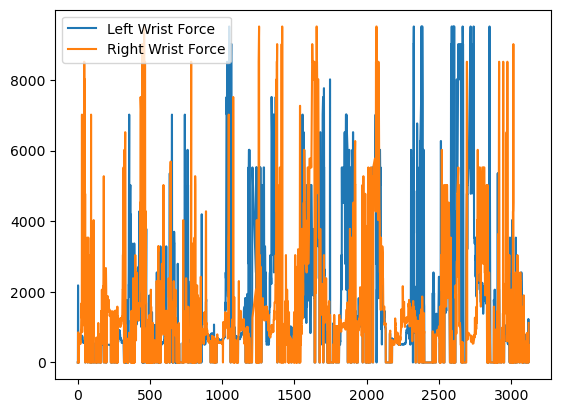

In [100]:


# Plotting the data
plt.plot(force_data["left_wrist_force"], label="Left Wrist Force")
plt.plot(force_data["right_wrist_force"], label="Right Wrist Force")
plt.legend()
plt.show()

In [ ]:
plt.plot(left_wrist_force)

In [75]:
left_wrist_force = [force for force in left_wrist_force if abs(force) < 1e4]
plt.title("left_wrist_force")
plt.plot(left_wrist_force)

TypeError: 'numpy.float64' object is not iterable

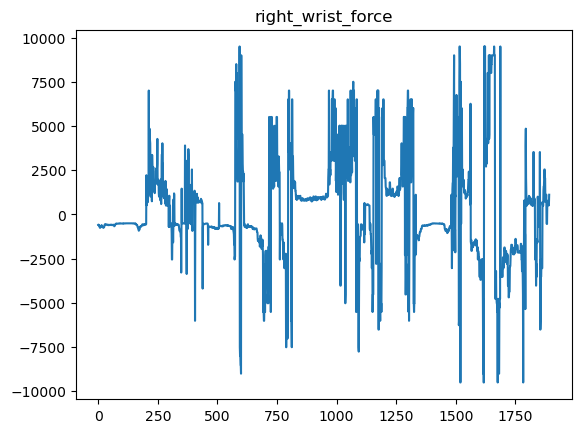

In [58]:
right_wrist_force = [force for force in left_wrist_force if abs(force) < 1e4]
plt.title("right_wrist_force")
plt.plot(right_wrist_force)


1 Nose\
2, 3 Left Eye, Right Eye\
4, 5 Left Ear, Right Ear\
6, 7 Left Shoulder, Right Shoulder\
8, 9 Left Elbow, Right Elbow\
10, 11 Left Wrist, Right Wrist\
12, 13 Left Hip, Right Hip\
14, 15 Left Knee, Right Knee\
16, 17 Left Ankle, Right Ankle